In [121]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
random.seed(1234)

In [2]:
rng = np.random.default_rng(1234)

# Raster Plot for 10 trials of spike data

0.1


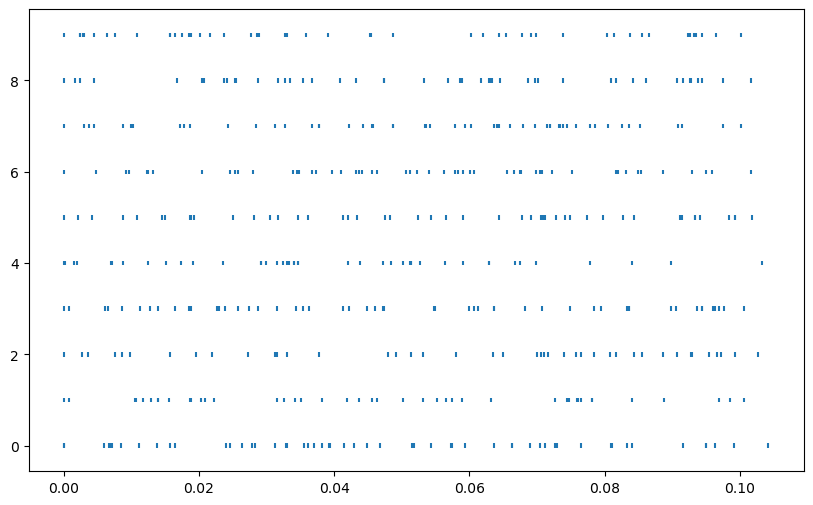

In [162]:
nu = 500
dt = 0.001

n_trials = 100000
bins = 100

T = dt * bins
print(T)

t_arr = np.arange(0, T, dt)

spikeTimes = []
n_events = []

for trial in range(n_trials):
    at = 0
    event_times = [at]
    while at < T:
        p = random.random()
        interval = -math.log(1 - p)/nu
        
        at += interval
        event_times.append(at)
            
    spikeTimes.append(event_times)
    n_events.append(len(event_times))

n_events = np.array(n_events)

fig, ax = plt.subplots(figsize=(10,6))
ax.eventplot(spikeTimes[:10], linelengths=0.1);

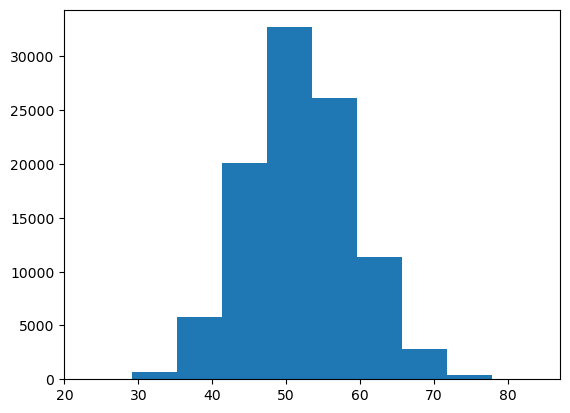

In [163]:
plt.hist(np.array(n_events));

In [164]:
n_mean = n_events.mean()
n_mean

52.00806

In [166]:
Delta = (n_events - n_mean)**2
FanoFactor = Delta.mean()/n_mean
FanoFactor, n_mean, nu*T

(0.9653714258213055, 52.00806, 50.0)

## Almost 1, as expected for Poisson process. Now calculate and plot PSTH

In [182]:
rho = []

for t in t_arr:
    n_spikes = 0
    for trial in range(n_trials):
        event_times = np.array(spikeTimes[trial])
        n_spikes += len(event_times[(event_times > t) & (event_times <= t+dt)])
    rho.append(n_spikes/(dt * n_trials))

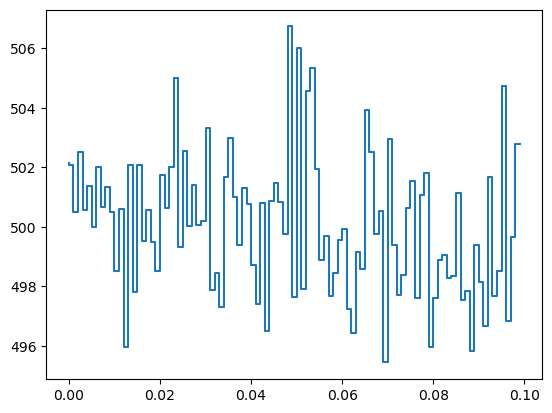

In [185]:
plt.step(t_arr, rho)